In [1]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

2024-05-05 13:41:36.273512: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 13:41:36.332604: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 13:41:37.529242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:
wandb.init()
config = wandb.config

config.max_len = 11
config.buckets = 20
labels, _, _ = get_labels()

In [3]:
# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

Saving vectors of label - 'down':   8%|████▏                                             | 1/12 [00:02<00:26,  2.39s/it]/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/preprocess.py:22: UserWarning: PySoundFile failed. Trying audioread instead.
  wave, sr = librosa.load(file_path, mono=True, sr=None)
/home/edward/.local/lib/python3.8/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Saving vectors of label - 'down':  17%|████████▎                                         | 2/12 [00:02<00:10,  1.05s/it]/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/preprocess.py:22: UserWarning: PySoundFile failed. Trying audioread instead.
  wave, sr = librosa.load(file_path, mono=True, sr=None)
/home/edward/.local/lib/python3.8/site-packages/librosa/core/audio.py:183: Futu

In [4]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [5]:
# # Feature dimension
channels = 1
config.epochs = 50
config.batch_size = 100

num_classes = 2

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

1.0


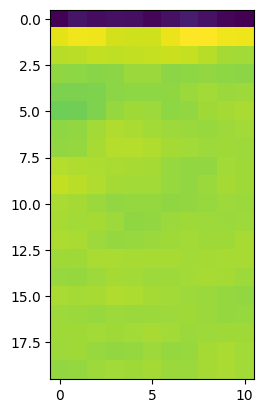

In [6]:
plt.imshow(X_train[10, :, :, 0])
print(y_train[10])

In [7]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [8]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

2024-05-05 13:41:47.306358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-05 13:41:47.309471: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
wandb: WARNING The data_type argument of wandb.keras.WandbCallback is deprecated and will be removed in a future release. Please use input_type instead.
wandb: WARNING Setting input_type = data_type.


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 169.7142 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.1s


1/1 [==============================] - 2s 2s/step - loss: 169.7142 - accuracy: 0.4615 - val_loss: 92.9754 - val_accuracy: 0.6667
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 160.4216 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 856ms/step - loss: 160.4216 - accuracy: 0.4615 - val_loss: 87.3256 - val_accuracy: 0.6667
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 151.1291 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 907ms/step - loss: 151.1291 - accuracy: 0.4615 - val_loss: 81.6756 - val_accuracy: 0.6667
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 141.8365 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 857ms/step - loss: 141.8365 - accuracy: 0.4615 - val_loss: 76.0256 - val_accuracy: 0.6667
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 132.5438 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 827ms/step - loss: 132.5438 - accuracy: 0.4615 - val_loss: 70.3757 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 123.2514 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 835ms/step - loss: 123.2514 - accuracy: 0.4615 - val_loss: 64.7258 - val_accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - ETA: 0s - loss: 113.9588 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 1s/step - loss: 113.9588 - accuracy: 0.4615 - val_loss: 59.0758 - val_accuracy: 0.6667
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 104.6661 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 805ms/step - loss: 104.6661 - accuracy: 0.4615 - val_loss: 53.4259 - val_accuracy: 0.6667
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 95.3735 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 788ms/step - loss: 95.3735 - accuracy: 0.4615 - val_loss: 47.7759 - val_accuracy: 0.6667
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 86.0810 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 786ms/step - loss: 86.0810 - accuracy: 0.4615 - val_loss: 42.1260 - val_accuracy: 0.6667
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 76.7884 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 832ms/step - loss: 76.7884 - accuracy: 0.4615 - val_loss: 36.4761 - val_accuracy: 0.6667
Epoch 12/50
1/1 [==============================] - ETA: 0s - loss: 67.4957 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 770ms/step - loss: 67.4957 - accuracy: 0.4615 - val_loss: 30.8261 - val_accuracy: 0.6667
Epoch 13/50
1/1 [==============================] - ETA: 0s - loss: 58.2032 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 832ms/step - loss: 58.2032 - accuracy: 0.4615 - val_loss: 25.1762 - val_accuracy: 0.6667
Epoch 14/50
1/1 [==============================] - ETA: 0s - loss: 48.9106 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 796ms/step - loss: 48.9106 - accuracy: 0.4615 - val_loss: 19.5262 - val_accuracy: 0.6667
Epoch 15/50
1/1 [==============================] - ETA: 0s - loss: 39.6180 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 877ms/step - loss: 39.6180 - accuracy: 0.4615 - val_loss: 13.8763 - val_accuracy: 0.6667
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 30.3254 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 798ms/step - loss: 30.3254 - accuracy: 0.4615 - val_loss: 8.2265 - val_accuracy: 0.6667
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 21.0329 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 787ms/step - loss: 21.0329 - accuracy: 0.4615 - val_loss: 3.5609 - val_accuracy: 0.7778
Epoch 18/50
1/1 [==============================] - ETA: 0s - loss: 12.4218 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 791ms/step - loss: 12.4218 - accuracy: 0.5385 - val_loss: 2.3923 - val_accuracy: 0.7778
Epoch 19/50
1/1 [==============================] - ETA: 0s - loss: 6.2820 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 38ms/step - loss: 6.2820 - accuracy: 0.5385 - val_loss: 6.5459 - val_accuracy: 0.6667
Epoch 20/50
1/1 [==============================] - ETA: 0s - loss: 5.5574 - accuracy: 0.4615

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 38ms/step - loss: 5.5574 - accuracy: 0.4615 - val_loss: 11.3427 - val_accuracy: 0.6667
Epoch 21/50
1/1 [==============================] - ETA: 0s - loss: 10.1880 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 37ms/step - loss: 10.1880 - accuracy: 0.6154 - val_loss: 15.5870 - val_accuracy: 0.4444
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: 14.4467 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 35ms/step - loss: 14.4467 - accuracy: 0.6154 - val_loss: 20.6417 - val_accuracy: 0.3333
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 17.8410 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 37ms/step - loss: 17.8410 - accuracy: 0.5385 - val_loss: 24.1779 - val_accuracy: 0.3333
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 20.1556 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 35ms/step - loss: 20.1556 - accuracy: 0.5385 - val_loss: 25.9423 - val_accuracy: 0.3333
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 21.2314 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 36ms/step - loss: 21.2314 - accuracy: 0.5385 - val_loss: 26.1471 - val_accuracy: 0.3333
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 21.2183 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 38ms/step - loss: 21.2183 - accuracy: 0.5385 - val_loss: 24.9760 - val_accuracy: 0.3333
Epoch 27/50
1/1 [==============================] - ETA: 0s - loss: 20.2461 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 35ms/step - loss: 20.2461 - accuracy: 0.5385 - val_loss: 22.5884 - val_accuracy: 0.3333
Epoch 28/50
1/1 [==============================] - ETA: 0s - loss: 18.4264 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 37ms/step - loss: 18.4264 - accuracy: 0.5385 - val_loss: 19.1383 - val_accuracy: 0.3333
Epoch 29/50
1/1 [==============================] - ETA: 0s - loss: 15.8675 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 34ms/step - loss: 15.8675 - accuracy: 0.5385 - val_loss: 15.2521 - val_accuracy: 0.4444
Epoch 30/50
1/1 [==============================] - ETA: 0s - loss: 13.0034 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 33ms/step - loss: 13.0034 - accuracy: 0.6154 - val_loss: 11.4745 - val_accuracy: 0.6667
Epoch 31/50
1/1 [==============================] - ETA: 0s - loss: 9.9054 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 35ms/step - loss: 9.9054 - accuracy: 0.6154 - val_loss: 8.5387 - val_accuracy: 0.6667
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 6.4631 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 35ms/step - loss: 6.4631 - accuracy: 0.6154 - val_loss: 5.3709 - val_accuracy: 0.6667
Epoch 33/50
1/1 [==============================] - ETA: 0s - loss: 3.7185 - accuracy: 0.7692

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 780ms/step - loss: 3.7185 - accuracy: 0.7692 - val_loss: 2.3436 - val_accuracy: 0.7778
Epoch 34/50
1/1 [==============================] - ETA: 0s - loss: 1.6234 - accuracy: 0.8462

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 812ms/step - loss: 1.6234 - accuracy: 0.8462 - val_loss: 0.7220 - val_accuracy: 0.8889
Epoch 35/50
1/1 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.7692

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 836ms/step - loss: 0.7016 - accuracy: 0.7692 - val_loss: 0.5686 - val_accuracy: 0.8889
Epoch 36/50
1/1 [==============================] - ETA: 0s - loss: 1.9493 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 39ms/step - loss: 1.9493 - accuracy: 0.6154 - val_loss: 1.1348 - val_accuracy: 0.8889
Epoch 37/50
1/1 [==============================] - ETA: 0s - loss: 3.7373 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 34ms/step - loss: 3.7373 - accuracy: 0.6154 - val_loss: 1.5087 - val_accuracy: 0.8889
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 4.7961 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 39ms/step - loss: 4.7961 - accuracy: 0.6154 - val_loss: 1.7098 - val_accuracy: 0.8889
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 5.1845 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 39ms/step - loss: 5.1845 - accuracy: 0.6154 - val_loss: 1.6755 - val_accuracy: 0.8889
Epoch 40/50
1/1 [==============================] - ETA: 0s - loss: 4.8897 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 39ms/step - loss: 4.8897 - accuracy: 0.6154 - val_loss: 1.4395 - val_accuracy: 0.8889
Epoch 41/50
1/1 [==============================] - ETA: 0s - loss: 3.9895 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 38ms/step - loss: 3.9895 - accuracy: 0.6154 - val_loss: 1.0857 - val_accuracy: 0.8889
Epoch 42/50
1/1 [==============================] - ETA: 0s - loss: 2.6100 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 39ms/step - loss: 2.6100 - accuracy: 0.6154 - val_loss: 0.6138 - val_accuracy: 0.8889
Epoch 43/50
1/1 [==============================] - ETA: 0s - loss: 0.8836 - accuracy: 0.6154

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 799ms/step - loss: 0.8836 - accuracy: 0.6154 - val_loss: 0.1059 - val_accuracy: 0.8889
Epoch 44/50
1/1 [==============================] - ETA: 0s - loss: 0.0771 - accuracy: 0.9231

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134147-ho82fud4/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 898ms/step - loss: 0.0771 - accuracy: 0.9231 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 1.0000

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 37ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.2265 - val_accuracy: 0.8889
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 0.9231

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 57ms/step - loss: 0.1568 - accuracy: 0.9231 - val_loss: 0.7425 - val_accuracy: 0.7778
Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.8462

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 36ms/step - loss: 0.5140 - accuracy: 0.8462 - val_loss: 1.2390 - val_accuracy: 0.7778
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 0.8578 - accuracy: 0.8462

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 36ms/step - loss: 0.8578 - accuracy: 0.8462 - val_loss: 1.5336 - val_accuracy: 0.7778
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 1.0617 - accuracy: 0.8462

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 38ms/step - loss: 1.0617 - accuracy: 0.8462 - val_loss: 1.6310 - val_accuracy: 0.7778
Epoch 50/50
1/1 [==============================] - ETA: 0s - loss: 1.1291 - accuracy: 0.8462

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 49ms/step - loss: 1.1291 - accuracy: 0.8462 - val_loss: 1.5474 - val_accuracy: 0.7778


In [10]:
testDir = '/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/test'
mfcc = wav2mfcc(os.path.join(testDir, '0up.wav'))

model.predict(mfcc[None,...])
# confidently predicted as up 

1/1 [==============================] - 0s 78ms/step


array([[2.7565463e-12, 1.0000000e+00]], dtype=float32)

In [11]:
# build model
model = Sequential()
#model.add(LSTM(16, input_shape=(config.buckets, config.max_len, channels), activation="sigmoid"))
model.add(LSTM(16, input_shape=(config.buckets, config.max_len), activation="sigmoid"))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [13]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▃▂▂▂▂▂▂▃▃▆▇▃▃▃▃▃▃▃██▇▇▇
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,██▇▇▆▆▅▅▄▄▃▃▂▂▂▁▁▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▅▂▁▁▁▁▁▁▂▅▅▆▇▇▇▇▇▇▇▇█▆▆▆▆
val_loss,██▇▇▆▅▅▅▄▃▃▂▂▁▁▁▂▃▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.84615
best_epoch,43
best_val_loss,0.01747
epoch,49
loss,1.12914
val_accuracy,0.77778


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.
/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134217-umeldu76/files/model-best/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134217-umeldu76/files/model-best/assets
wandb: Adding directory to artifact (/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/wandb/run-20240505_134217-umeldu76/files/model-best)... Done. 0.0s


1/1 [==============================] - 4s 4s/step - loss: 0.6922 - accuracy: 0.5385 - val_loss: 0.7074 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 48ms/step - loss: 0.6920 - accuracy: 0.5385 - val_loss: 0.7079 - val_accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 56ms/step - loss: 0.6918 - accuracy: 0.5385 - val_loss: 0.7084 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 66ms/step - loss: 0.6916 - accuracy: 0.5385 - val_loss: 0.7089 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 51ms/step - loss: 0.6914 - accuracy: 0.5385 - val_loss: 0.7094 - val_accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 48ms/step - loss: 0.6912 - accuracy: 0.5385 - val_loss: 0.7099 - val_accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 65ms/step - loss: 0.6910 - accuracy: 0.5385 - val_loss: 0.7104 - val_accuracy: 0.3333
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 49ms/step - loss: 0.6908 - accuracy: 0.5385 - val_loss: 0.7109 - val_accuracy: 0.3333
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 47ms/step - loss: 0.6906 - accuracy: 0.5385 - val_loss: 0.7113 - val_accuracy: 0.3333
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 54ms/step - loss: 0.6904 - accuracy: 0.5385 - val_loss: 0.7118 - val_accuracy: 0.3333
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 50ms/step - loss: 0.6902 - accuracy: 0.5385 - val_loss: 0.7123 - val_accuracy: 0.3333
Epoch 12/50
1/1 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 53ms/step - loss: 0.6900 - accuracy: 0.5385 - val_loss: 0.7128 - val_accuracy: 0.3333
Epoch 13/50
1/1 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 44ms/step - loss: 0.6898 - accuracy: 0.5385 - val_loss: 0.7133 - val_accuracy: 0.3333
Epoch 14/50
1/1 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 92ms/step - loss: 0.6895 - accuracy: 0.5385 - val_loss: 0.7137 - val_accuracy: 0.3333
Epoch 15/50
1/1 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 85ms/step - loss: 0.6893 - accuracy: 0.5385 - val_loss: 0.7142 - val_accuracy: 0.3333
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 46ms/step - loss: 0.6891 - accuracy: 0.5385 - val_loss: 0.7147 - val_accuracy: 0.3333
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 46ms/step - loss: 0.6889 - accuracy: 0.5385 - val_loss: 0.7151 - val_accuracy: 0.3333
Epoch 18/50
1/1 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 51ms/step - loss: 0.6887 - accuracy: 0.5385 - val_loss: 0.7155 - val_accuracy: 0.3333
Epoch 19/50
1/1 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 64ms/step - loss: 0.6884 - accuracy: 0.5385 - val_loss: 0.7159 - val_accuracy: 0.3333
Epoch 20/50
1/1 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 47ms/step - loss: 0.6882 - accuracy: 0.5385 - val_loss: 0.7163 - val_accuracy: 0.3333
Epoch 21/50
1/1 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 44ms/step - loss: 0.6880 - accuracy: 0.5385 - val_loss: 0.7167 - val_accuracy: 0.3333
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 50ms/step - loss: 0.6878 - accuracy: 0.5385 - val_loss: 0.7170 - val_accuracy: 0.3333
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 0.6875 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 65ms/step - loss: 0.6875 - accuracy: 0.5385 - val_loss: 0.7173 - val_accuracy: 0.3333
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 45ms/step - loss: 0.6873 - accuracy: 0.5385 - val_loss: 0.7176 - val_accuracy: 0.3333
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 51ms/step - loss: 0.6871 - accuracy: 0.5385 - val_loss: 0.7179 - val_accuracy: 0.3333
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 55ms/step - loss: 0.6868 - accuracy: 0.5385 - val_loss: 0.7181 - val_accuracy: 0.3333
Epoch 27/50
1/1 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 46ms/step - loss: 0.6866 - accuracy: 0.5385 - val_loss: 0.7184 - val_accuracy: 0.3333
Epoch 28/50
1/1 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 47ms/step - loss: 0.6863 - accuracy: 0.5385 - val_loss: 0.7185 - val_accuracy: 0.3333
Epoch 29/50
1/1 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 45ms/step - loss: 0.6861 - accuracy: 0.5385 - val_loss: 0.7187 - val_accuracy: 0.3333
Epoch 30/50
1/1 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 43ms/step - loss: 0.6858 - accuracy: 0.5385 - val_loss: 0.7188 - val_accuracy: 0.3333
Epoch 31/50
1/1 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 42ms/step - loss: 0.6855 - accuracy: 0.5385 - val_loss: 0.7189 - val_accuracy: 0.3333
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 43ms/step - loss: 0.6853 - accuracy: 0.5385 - val_loss: 0.7190 - val_accuracy: 0.3333
Epoch 33/50
1/1 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 49ms/step - loss: 0.6850 - accuracy: 0.5385 - val_loss: 0.7190 - val_accuracy: 0.3333
Epoch 34/50
1/1 [==============================] - ETA: 0s - loss: 0.6847 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 57ms/step - loss: 0.6847 - accuracy: 0.5385 - val_loss: 0.7190 - val_accuracy: 0.3333
Epoch 35/50
1/1 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 50ms/step - loss: 0.6844 - accuracy: 0.5385 - val_loss: 0.7189 - val_accuracy: 0.3333
Epoch 36/50
1/1 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 46ms/step - loss: 0.6841 - accuracy: 0.5385 - val_loss: 0.7189 - val_accuracy: 0.3333
Epoch 37/50
1/1 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 45ms/step - loss: 0.6838 - accuracy: 0.5385 - val_loss: 0.7188 - val_accuracy: 0.3333
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 41ms/step - loss: 0.6835 - accuracy: 0.5385 - val_loss: 0.7186 - val_accuracy: 0.3333
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 0.6832 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 43ms/step - loss: 0.6832 - accuracy: 0.5385 - val_loss: 0.7184 - val_accuracy: 0.3333
Epoch 40/50
1/1 [==============================] - ETA: 0s - loss: 0.6829 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 45ms/step - loss: 0.6829 - accuracy: 0.5385 - val_loss: 0.7182 - val_accuracy: 0.3333
Epoch 41/50
1/1 [==============================] - ETA: 0s - loss: 0.6826 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 46ms/step - loss: 0.6826 - accuracy: 0.5385 - val_loss: 0.7180 - val_accuracy: 0.3333
Epoch 42/50
1/1 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 48ms/step - loss: 0.6822 - accuracy: 0.5385 - val_loss: 0.7177 - val_accuracy: 0.3333
Epoch 43/50
1/1 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 46ms/step - loss: 0.6819 - accuracy: 0.5385 - val_loss: 0.7175 - val_accuracy: 0.3333
Epoch 44/50
1/1 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 51ms/step - loss: 0.6815 - accuracy: 0.5385 - val_loss: 0.7171 - val_accuracy: 0.3333
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 51ms/step - loss: 0.6812 - accuracy: 0.5385 - val_loss: 0.7168 - val_accuracy: 0.3333
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 46ms/step - loss: 0.6808 - accuracy: 0.5385 - val_loss: 0.7165 - val_accuracy: 0.3333
Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 0.6804 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 42ms/step - loss: 0.6804 - accuracy: 0.5385 - val_loss: 0.7161 - val_accuracy: 0.3333
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 43ms/step - loss: 0.6800 - accuracy: 0.5385 - val_loss: 0.7157 - val_accuracy: 0.3333
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 49ms/step - loss: 0.6796 - accuracy: 0.5385 - val_loss: 0.7153 - val_accuracy: 0.3333
Epoch 50/50
1/1 [==============================] - ETA: 0s - loss: 0.6793 - accuracy: 0.5385

wandb: WARNING No validation_data set, pass a generator to the callback.


1/1 [==============================] - 0s 51ms/step - loss: 0.6793 - accuracy: 0.5385 - val_loss: 0.7148 - val_accuracy: 0.3333


In [14]:
os.path.join(testDir, '0up.wav')

'/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/test/0up.wav'

In [15]:
ls '/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/test/0up.wav'

'/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/test/0up.wav'*


In [16]:
np.shape(mfcc[None,...])

(1, 20, 11)

In [17]:
type(mfcc)

numpy.ndarray

In [18]:
testDir = '/mnt/c/Users/edwar/OneDrive - UTS/jupyter notebooks/49275/videoCopy/test'
mfcc = wav2mfcc(os.path.join(testDir, '0up.wav'))

model.predict(mfcc[None,...])
# unconfidently predicted as up

1/1 [==============================] - 0s 246ms/step


array([[0.45574844, 0.54425156]], dtype=float32)